# Faster R-CNN 으로 Truck과 Bus 탐지하기

## 1. Bus-Truck 데이터셋 살펴보기

In [4]:
import os
import pandas as pd
from utils import CLASS_NAME_TO_ID, visualize

In [3]:
data_dir = "../DATASET/Detection/"
data_df = pd.read_csv(os.path.join(data_dir, 'df.csv'))

In [4]:
data_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,fff2b15ad6007d0e,activemil,Truck,1,0.277344,0.622656,0.226389,0.859722,0,0,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
24058,fff376d20410e4c9,xclick,Bus,1,0.295625,0.558750,0.306667,0.397500,1,0,...,1,0,0.424375,0.316250,0.295625,0.558750,0.306667,0.397500,0.382500,0.335833
24059,fff376d20410e4c9,xclick,Bus,1,0.348125,0.701250,0.423333,0.744167,0,0,...,1,0,0.478750,0.493125,0.348125,0.701250,0.423333,0.744167,0.537500,0.523333
24060,fffde5953a818927,xclick,Bus,1,0.277500,0.605625,0.565000,0.795833,0,0,...,0,0,0.488125,0.277500,0.517500,0.605625,0.565000,0.670000,0.795833,0.704167


In [5]:
index = 0
image_files = [fn for fn in os.listdir("../DATASET/Detection/images/") if fn.endswith("jpg")]
image_file = image_files[index]
image_path = os.path.join("../DATASET/Detection/images/", image_file)

In [5]:
import cv2
import matplotlib.pyplot as plt

In [7]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

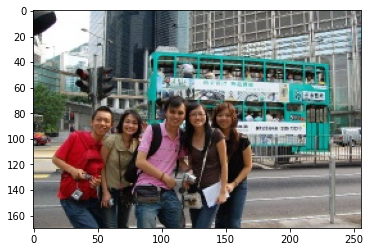

In [8]:
plt.imshow(image)

In [9]:
image_id = image_file.split('.')[0]
meta_data = data_df[data_df['ImageID'] == image_id]
cate_names = meta_data["LabelName"].values
bboxes = meta_data[["XMin", "XMax", "YMin", "YMax"]].values

In [10]:
cate_names

array(['Bus'], dtype=object)

In [11]:
bboxes

array([[0.34375 , 0.90875 , 0.156162, 0.650047]])

In [12]:
img_H, img_W, _ = image.shape

class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]
unnorm_bboxes = bboxes.copy()
unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]] # 순서 바꾸기
unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2] # w, h = xmax - xmin, ymax-ymin
unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2) # xmin, ymin -> x_center, y_center = x_min + w/2, y_min + h/2

# (x_cen, w) / image_w
# (y_cen, h) / image_h 
unnorm_bboxes[:, [0,2]] *= img_W
unnorm_bboxes[:, [1,3]] *= img_H

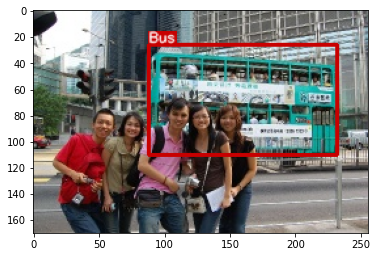

In [13]:
canvas = visualize(image, unnorm_bboxes, class_ids)
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [14]:
from ipywidgets import interact

In [15]:
@interact(index=(0, len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join("../DATASET/Detection/images/", image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image_id = image_file.split('.')[0]
    meta_data = data_df[data_df['ImageID'] == image_id]
    cate_names = meta_data["LabelName"].values
    bboxes = meta_data[["XMin", "XMax", "YMin", "YMax"]].values
    
    img_H, img_W, _ = image.shape

    class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]
    unnorm_bboxes = bboxes.copy()
    unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]]
    unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2]
    unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2)
    unnorm_bboxes[:, [0,2]] *= img_W
    unnorm_bboxes[:, [1,3]] *= img_H
    canvas = visualize(image, unnorm_bboxes, class_ids)
    
    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=15224), Output()), _dom_classes=('widget-int…

## 2. Object detection 데이터셋 구축과 연산을 위한 텐서변환 모듈 작성하기

In [1]:
import torch
import numpy as np

In [6]:
class Detection_dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.data_dir = data_dir
        self.phase = phase
        self.data_df = pd.read_csv(os.path.join(self.data_dir, 'df.csv'))
        self.image_files = [fn for fn in os.listdir(os.path.join(self.data_dir, phase)) if fn.endswith("jpg")]
        self.transformer = transformer
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        # input : image
        # tagget : label (box, class_id)
        # get_image -> filiname(imageId) -> get_label
        filename, image = self.get_image(index)
        bboxes, class_ids = self.get_label(filename)
        img_H, img_W, _ = image.shape
        if self.transformer:
            # image shape: (H, W, C)
            # tensor hspa: (C, H, W)
            image = self.transformer(image)
            _, img_H, img_W = image.shape
        
        bboxes[:, [0,2]] *= img_W
        bboxes[:, [1,3]] *= img_H
        # bboxes = [[xmin, ymin, xmax, ymax]] -> [0,2]:xmin, xmax / [1,3]: ymin, ymax
        
        target = {}
        target["boxes"] = torch.Tensor(bboxes).float()
        target["labels"] = torch.Tensor(class_ids).long()
            
        return image, target, filename
            
    def get_image(self, index):
        filename = self.image_files[index]
        image_path = os.path.join(self.data_dir, self.phase, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return filename, image
    
    def get_label(self, filename):
        image_id = filename.split('.')[0]
        meta_data = self.data_df[self.data_df['ImageID'] == image_id]
        cate_names = meta_data["LabelName"].values
        class_ids = np.array([CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names])
        bboxes = meta_data[["XMin", "XMax", "YMin", "YMax"]].values
        bboxes[:, [1,2]] = bboxes[:, [2,1]]
        return bboxes, class_ids

In [ ]:
# X1, Y1, X2, Y2 = XMIN, YMIN, XMAX, YMAX
# X_CEN, Y_CEN, W, H = YOLO SERIES
# X_MIN, Y_MIN, W, H = COCO BOUNDING BOX FORMAT

In [7]:
data_dir = "../DATASET/Detection/"
dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=None)

In [8]:
len(dataset)

13703

In [9]:
dataset[0]

(array([[[3, 3, 3],
         [3, 3, 3],
         [4, 4, 4],
         ...,
         [8, 8, 6],
         [4, 4, 2],
         [4, 4, 2]],
 
        [[4, 4, 4],
         [4, 4, 4],
         [4, 4, 4],
         ...,
         [9, 9, 7],
         [4, 4, 2],
         [4, 4, 2]],
 
        [[4, 4, 4],
         [4, 4, 4],
         [4, 4, 4],
         ...,
         [9, 9, 7],
         [4, 4, 2],
         [4, 4, 2]],
 
        ...,
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [4, 4, 4],
         [4, 4, 4],
         [4, 4, 4]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [2, 2, 2],
         ...,
         [4, 4, 4],
         [5, 5, 5],
         [5, 5, 5]]], dtype=uint8),
 {'boxes': tensor([[ 66.4000, 105.4401, 208.1600, 153.4401]]),
  'labels': tensor([1])},
 '63908fdf1f3d13fe.jpg')

In [10]:
index = 0
image, target, filename = dataset[index]

In [11]:
image.shape

(192, 256, 3)

In [12]:
target

{'boxes': tensor([[ 66.4000, 105.4401, 208.1600, 153.4401]]),
 'labels': tensor([1])}

In [13]:
dataset.data_df.iloc[0]

ImageID        0000599864fd15b3
Source                   xclick
LabelName                   Bus
Confidence                    1
XMin                    0.34375
XMax                    0.90875
YMin                   0.156162
YMax                   0.650047
IsOccluded                    1
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
XClick1X               0.421875
XClick2X                0.34375
XClick3X                  0.795
XClick4X                0.90875
XClick1Y               0.156162
XClick2Y                 0.5127
XClick3Y               0.650047
XClick4Y               0.457197
Name: 0, dtype: object

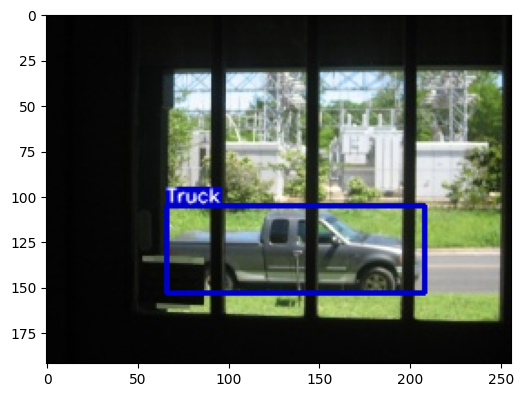

In [14]:
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()

n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

canvas = visualize(image, bboxes, class_ids)

plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [23]:
@interact(index=(0, len(dataset)-1))
def show_sample(index=0):
    image, target, filename = dataset[index]
    boxes = target['boxes'].numpy()
    class_ids = target['labels'].numpy()

    n_obj = boxes.shape[0]
    bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
    bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
    bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

    canvas = visualize(image, bboxes, class_ids)

    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=13702), Output()), _dom_classes=('widget-int…

In [24]:
from torchvision import transforms

In [25]:
IMAGE_SIZE = 448

transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
transformer

In [26]:
data_dir = "../DATASET/Detection/"
transformed_dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)

In [27]:
from torchvision.utils import make_grid

In [28]:
index = 5
image, target, filename = transformed_dataset[index]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


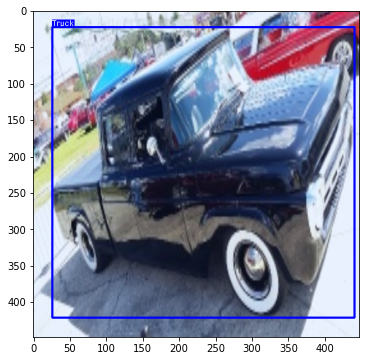

In [29]:
np_image = make_grid(image, normalize=True).cpu().permute(1,2,0).numpy()
# plt.imshow(np_image)
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()

n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

canvas = visualize(np_image, bboxes, class_ids)

plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [30]:
from torch.utils.data import DataLoader

In [31]:
def collate_fn(batch):
    image_list = []
    target_list = []
    filename_list = []
    
    for a,b,c in batch:
        image_list.append(a)
        target_list.append(b)
        filename_list.append(c)

    return image_list, target_list, filename_list

In [32]:
data_dir = "../DATASET/Detection/"
BATCH_SIZE = 6

trainset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [33]:
for index, batch in enumerate(trainloader):
    images = batch[0]
    targets = batch[1]
    filenames = batch[2]
    
    if index == 0:
        break

In [ ]:
len(images)

In [ ]:
images[0].shape

In [ ]:
targets

In [ ]:
filenames

In [34]:
def build_dataloader(data_dir, batch_size=4, image_size=448):
    transformer = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize(size=(image_size, image_size)),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    dataloaders = {}
    train_dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)
    dataloaders["train"] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    val_dataset = Detection_dataset(data_dir=data_dir, phase="val", transformer=transformer)
    dataloaders["val"] = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
    return dataloaders

제대로 작성했는지 확인

In [35]:
data_dir = "../DATASET/Detection/"
dloaders = build_dataloader(data_dir, batch_size=4, image_size=448)

for phase in ["train", "val"]:
    for index, batch in enumerate(dloaders[phase]):
        images = batch[0]
        targets = batch[1]
        filenames = batch[2]
        print(f"{phase} - {targets}")
        print({f"{phase} - {filenames}"})
        if index == 0:
            break

[{'boxes': tensor([[  0.0000, 206.6911, 268.4076, 315.6362]]), 'labels': tensor([1])}, {'boxes': tensor([[ 31.0800,   8.1330, 422.8000, 442.2392]]), 'labels': tensor([0])}, {'boxes': tensor([[ 14.2800,  94.0800, 425.0400, 428.2132],
        [118.4400, 130.2932, 322.8400, 188.9068],
        [386.9600, 161.2800, 419.4400, 216.9068],
        [400.4000, 152.6932, 447.7200, 213.5468]]), 'labels': tensor([1, 1, 1, 1])}, {'boxes': tensor([[  0.0000, 148.1666,  38.9375, 269.4998],
        [  5.6874, 143.4998, 219.1876, 269.4998],
        [200.3752,  92.7499, 425.2501, 252.0000],
        [208.2501, 145.8334, 304.9375, 261.3332]]), 'labels': tensor([0, 0, 0, 0])}]
[{'boxes': tensor([[ 80.9200, 186.5965, 303.5200, 393.7862]]), 'labels': tensor([1])}]


## 3. Faster R-CNN 아키텍처 불러오기

In [36]:
from torchvision import models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

def build_model(num_classes):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [37]:
NUM_CLASSES = 2
model = build_model(num_classes=NUM_CLASSES)

In [37]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
in_features = model.roi_heads.box_predictor.cls_score.in_features

In [ ]:
num_classes = 2
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [ ]:
model

In [ ]:
def build_model(num_classes):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

## 4. Detector 학습을 위한 코드 작성하기

In [38]:
phase = 'train'
model.train()

for index, batch in enumerate(dloaders[phase]):
    images = batch[0]
    targets = batch[1]
    filenames = batch[2]
        
    images = list(image for image in images)
    targets = [{k: v for k, v in t.items()} for t in targets]
    
    loss = model(images, targets)
    if index == 0:
        break

In [39]:
loss

{'loss_classifier': tensor(2.2535, grad_fn=<NllLossBackward>),
 'loss_box_reg': tensor(0.0531, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.2732, grad_fn=<BinaryCrossEntropyWithLogitsBackward>),
 'loss_rpn_box_reg': tensor(0.0143, grad_fn=<DivBackward0>)}

In [40]:
from collections import defaultdict

def train_one_epoch(dataloaders, model, optimizer, device):
    train_loss = defaultdict(float)
    val_loss = defaultdict(float)
    
    model.train()
    
    for phase in ["train", "val"]:
        for index, batch in enumerate(dataloaders[phase]):
            images = batch[0]
            targets = batch[1]
            filenames = batch[2]
    
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            
            with torch.set_grad_enabled(phase == "train"):
                loss = model(images, targets)
            total_loss = sum(each_loss for each_loss in loss.values())
            
            if phase == "train":
                optimizer.zero_grad()
                total_loss.backward()
                optimizer.step()

                if (index > 0) and (index % VERBOSE_FREQ) == 0:
                    text = f"{index}/{len(dataloaders[phase])} - "
                    for k, v in loss.items():
                        text += f"{k}: {v.item():.4f}  "
                    print(text)

                for k, v in loss.items():
                    train_loss[k] += v.item()
                train_loss["total_loss"] += total_loss.item()
                
            else:
                for k, v in loss.items():
                    val_loss[k] += v.item()
                val_loss["total_loss"] += total_loss.item()
                
    for k in train_loss.keys():
        train_loss[k] /= len(dataloaders["train"])
        val_loss[k] /= len(dataloaders["val"])
    return train_loss, val_loss

In [41]:
from utils import save_model

In [42]:
data_dir = "../DATASET/Detection/"
is_cuda = True

NUM_CLASSES = 2
IMAGE_SIZE = 448
BATCH_SIZE = 6
VERBOSE_FREQ = 200
DEVICE = torch.device('cuda' if torch.cuda.is_available and is_cuda else 'cpu')

dataloaders = build_dataloader(data_dir=data_dir, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)
model = build_model(num_classes=NUM_CLASSES)
model = model.to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [43]:
num_epochs = 30

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss, val_loss = train_one_epoch(dataloaders, model, optimizer, DEVICE)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f"epoch:{epoch+1}/{num_epochs} - Train Loss: {train_loss['total_loss']:.4f}, Val Loss: {val_loss['total_loss']:.4f}")
    
    if (epoch+1) % 10 == 0:
        save_model(model.state_dict(), f'model_{epoch+1}.pth')

200/2284 - loss_classifier: 0.0978  loss_box_reg: 0.1096  loss_objectness: 0.0170  loss_rpn_box_reg: 0.0073  
400/2284 - loss_classifier: 0.0332  loss_box_reg: 0.0421  loss_objectness: 0.0092  loss_rpn_box_reg: 0.0061  
600/2284 - loss_classifier: 0.0345  loss_box_reg: 0.0471  loss_objectness: 0.0012  loss_rpn_box_reg: 0.0050  
800/2284 - loss_classifier: 0.0371  loss_box_reg: 0.0576  loss_objectness: 0.0135  loss_rpn_box_reg: 0.0062  
1000/2284 - loss_classifier: 0.0125  loss_box_reg: 0.0000  loss_objectness: 0.0108  loss_rpn_box_reg: 0.0074  
1200/2284 - loss_classifier: 0.0093  loss_box_reg: 0.0084  loss_objectness: 0.0834  loss_rpn_box_reg: 0.0578  
1400/2284 - loss_classifier: 0.0266  loss_box_reg: 0.0099  loss_objectness: 0.0098  loss_rpn_box_reg: 0.0065  
1600/2284 - loss_classifier: 0.1120  loss_box_reg: 0.0939  loss_objectness: 0.0265  loss_rpn_box_reg: 0.0182  
1800/2284 - loss_classifier: 0.0301  loss_box_reg: 0.0263  loss_objectness: 0.0087  loss_rpn_box_reg: 0.0032  
2000/

1400/2284 - loss_classifier: 0.0222  loss_box_reg: 0.0417  loss_objectness: 0.0029  loss_rpn_box_reg: 0.0021  
1600/2284 - loss_classifier: 0.0063  loss_box_reg: 0.0086  loss_objectness: 0.0030  loss_rpn_box_reg: 0.0023  
1800/2284 - loss_classifier: 0.0110  loss_box_reg: 0.0147  loss_objectness: 0.0024  loss_rpn_box_reg: 0.0040  
2000/2284 - loss_classifier: 0.0160  loss_box_reg: 0.0216  loss_objectness: 0.0048  loss_rpn_box_reg: 0.0057  
2200/2284 - loss_classifier: 0.0290  loss_box_reg: 0.0526  loss_objectness: 0.0097  loss_rpn_box_reg: 0.0079  
epoch:7/30 - Train Loss: 0.0642, Val Loss: 0.1142
200/2284 - loss_classifier: 0.0302  loss_box_reg: 0.0618  loss_objectness: 0.0016  loss_rpn_box_reg: 0.0033  
400/2284 - loss_classifier: 0.0139  loss_box_reg: 0.0284  loss_objectness: 0.0049  loss_rpn_box_reg: 0.0032  
600/2284 - loss_classifier: 0.0241  loss_box_reg: 0.0474  loss_objectness: 0.0028  loss_rpn_box_reg: 0.0035  
800/2284 - loss_classifier: 0.0276  loss_box_reg: 0.0559  loss_ob

200/2284 - loss_classifier: 0.0103  loss_box_reg: 0.0177  loss_objectness: 0.0006  loss_rpn_box_reg: 0.0013  
400/2284 - loss_classifier: 0.0188  loss_box_reg: 0.0301  loss_objectness: 0.0026  loss_rpn_box_reg: 0.0028  
600/2284 - loss_classifier: 0.0082  loss_box_reg: 0.0148  loss_objectness: 0.0002  loss_rpn_box_reg: 0.0024  
800/2284 - loss_classifier: 0.0049  loss_box_reg: 0.0068  loss_objectness: 0.0059  loss_rpn_box_reg: 0.0067  
1000/2284 - loss_classifier: 0.0056  loss_box_reg: 0.0119  loss_objectness: 0.0060  loss_rpn_box_reg: 0.0138  
1200/2284 - loss_classifier: 0.0035  loss_box_reg: 0.0053  loss_objectness: 0.0029  loss_rpn_box_reg: 0.0013  
1400/2284 - loss_classifier: 0.0117  loss_box_reg: 0.0191  loss_objectness: 0.0029  loss_rpn_box_reg: 0.0037  
1600/2284 - loss_classifier: 0.0210  loss_box_reg: 0.0474  loss_objectness: 0.0006  loss_rpn_box_reg: 0.0019  
1800/2284 - loss_classifier: 0.0170  loss_box_reg: 0.0347  loss_objectness: 0.0041  loss_rpn_box_reg: 0.0030  
2000/

1400/2284 - loss_classifier: 0.0159  loss_box_reg: 0.0206  loss_objectness: 0.0007  loss_rpn_box_reg: 0.0081  
1600/2284 - loss_classifier: 0.0067  loss_box_reg: 0.0129  loss_objectness: 0.0016  loss_rpn_box_reg: 0.0019  
1800/2284 - loss_classifier: 0.0093  loss_box_reg: 0.0141  loss_objectness: 0.0011  loss_rpn_box_reg: 0.0020  
2000/2284 - loss_classifier: 0.0024  loss_box_reg: 0.0043  loss_objectness: 0.0014  loss_rpn_box_reg: 0.0046  
2200/2284 - loss_classifier: 0.0174  loss_box_reg: 0.0301  loss_objectness: 0.0012  loss_rpn_box_reg: 0.0049  
epoch:20/30 - Train Loss: 0.0306, Val Loss: 0.1718
200/2284 - loss_classifier: 0.0031  loss_box_reg: 0.0052  loss_objectness: 0.0005  loss_rpn_box_reg: 0.0049  
400/2284 - loss_classifier: 0.0048  loss_box_reg: 0.0130  loss_objectness: 0.0015  loss_rpn_box_reg: 0.0023  
600/2284 - loss_classifier: 0.0083  loss_box_reg: 0.0134  loss_objectness: 0.0006  loss_rpn_box_reg: 0.0033  
800/2284 - loss_classifier: 0.0022  loss_box_reg: 0.0056  loss_o

200/2284 - loss_classifier: 0.0083  loss_box_reg: 0.0113  loss_objectness: 0.0001  loss_rpn_box_reg: 0.0011  
400/2284 - loss_classifier: 0.0033  loss_box_reg: 0.0098  loss_objectness: 0.0001  loss_rpn_box_reg: 0.0024  
600/2284 - loss_classifier: 0.0052  loss_box_reg: 0.0084  loss_objectness: 0.0003  loss_rpn_box_reg: 0.0034  
800/2284 - loss_classifier: 0.0061  loss_box_reg: 0.0094  loss_objectness: 0.0007  loss_rpn_box_reg: 0.0051  
1000/2284 - loss_classifier: 0.0035  loss_box_reg: 0.0060  loss_objectness: 0.0001  loss_rpn_box_reg: 0.0015  
1200/2284 - loss_classifier: 0.0077  loss_box_reg: 0.0114  loss_objectness: 0.0003  loss_rpn_box_reg: 0.0026  
1400/2284 - loss_classifier: 0.0020  loss_box_reg: 0.0037  loss_objectness: 0.0016  loss_rpn_box_reg: 0.0021  
1600/2284 - loss_classifier: 0.0034  loss_box_reg: 0.0053  loss_objectness: 0.0001  loss_rpn_box_reg: 0.0011  
1800/2284 - loss_classifier: 0.0079  loss_box_reg: 0.0151  loss_objectness: 0.0012  loss_rpn_box_reg: 0.0013  
2000/

In [47]:
tr_loss_classifier = [] 
tr_loss_box_reg = []
tr_loss_objectness = []
tr_loss_rpn_box_reg = []
tr_loss_total = []

for tr_loss in train_losses:
    tr_loss_classifier.append(tr_loss['loss_classifier'])
    tr_loss_box_reg.append(tr_loss['loss_box_reg'])
    tr_loss_objectness.append(tr_loss['loss_objectness'])
    tr_loss_rpn_box_reg.append(tr_loss['loss_rpn_box_reg'])
    tr_loss_total.append(tr_loss['total_loss'])

val_loss_classifier = [] 
val_loss_box_reg = []
val_loss_objectness = []
val_loss_rpn_box_reg = []
val_loss_total = []

for vl_loss in val_losses:
    val_loss_classifier.append(vl_loss['loss_classifier'])
    val_loss_box_reg.append(vl_loss['loss_box_reg'])
    val_loss_objectness.append(vl_loss['loss_objectness'])
    val_loss_rpn_box_reg.append(vl_loss['loss_rpn_box_reg'])
    val_loss_total.append(vl_loss['total_loss'])

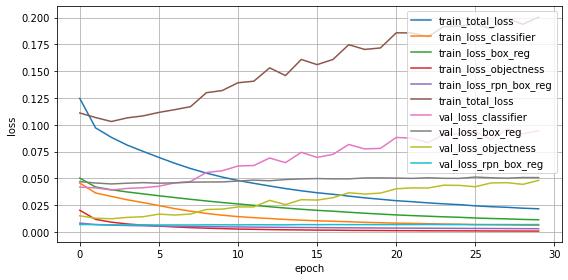

In [48]:
plt.figure(figsize=(8, 4))
plt.plot(tr_loss_total, label="train_total_loss")
plt.plot(tr_loss_classifier, label="train_loss_classifier")
plt.plot(tr_loss_box_reg,  label="train_loss_box_reg")
plt.plot(tr_loss_objectness, label="train_loss_objectness")
plt.plot(tr_loss_rpn_box_reg,  label="train_loss_rpn_box_reg")

plt.plot(val_loss_total, label="train_total_loss")
plt.plot(val_loss_classifier, label="val_loss_classifier")
plt.plot(val_loss_box_reg,  label="val_loss_box_reg")
plt.plot(val_loss_objectness, label="val_loss_objectness")
plt.plot(val_loss_rpn_box_reg,  label="val_loss_rpn_box_reg")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid("on")
plt.legend(loc='upper right')
plt.tight_layout()

## 5. Confidence threshold 와 Non-maximum suppression(NMS) 소개와 적용해보기

In [42]:
import torch

In [43]:
def load_model(ckpt_path, num_classes, device):
    checkpoint = torch.load(ckpt_path, map_location=device)
    model = build_model(num_classes=num_classes)
    model.load_state_dict(checkpoint)
    model = model.to(device)
    model.eval()
    return model

In [44]:
is_cuda = True

NUM_CLASSES = 2
DEVICE = torch.device('cuda' if is_cuda and torch.cuda.is_available() else 'cpu')

data_dir = "../DATASET/Detection/"
dataloaders = build_dataloader(data_dir, batch_size=1)
num_classes = len(CLASS_NAME_TO_ID)

model = load_model(ckpt_path='./trained_model/model_30.pth', num_classes=NUM_CLASSES, device=DEVICE)

In [45]:
from torchvision.ops import nms

def postprocess(prediction, conf_thres=0.2, IoU_threshold=0.1):
    pred_box = prediction["boxes"].cpu().detach().numpy()
    pred_label = prediction["labels"].cpu().detach().numpy()
    pred_conf = prediction['scores'].cpu().detach().numpy()
    
    conf_thres = 0.2
    valid_index = pred_conf > conf_thres
    pred_box = pred_box[valid_index]
    pred_label = pred_label[valid_index]
    pred_conf = pred_conf[valid_index]
    
    valid_index = nms(torch.tensor(pred_box.astype(np.float32)), torch.tensor(pred_conf), IoU_threshold)
    pred_box = pred_box[valid_index.numpy()]
    pred_conf = pred_conf[valid_index.numpy()]
    pred_label = pred_label[valid_index.numpy()]
    return np.concatenate((pred_box, pred_conf[:, np.newaxis], pred_label[:, np.newaxis]), axis=1)

In [46]:
from torchvision.utils import make_grid

In [53]:
pred_images = []
pred_labels =[]

for index, (images, _, filenames) in enumerate(dataloaders["val"]):
    images = list(image.to(DEVICE) for image in images)
    filename = filenames[0]
    
    image = make_grid(images[0].cpu().detach(), normalize=True).permute(1,2,0).numpy()
    image = (image * 255).astype(np.uint8)
    
    with torch.no_grad():
        prediction = model(images)
        
    prediction = postprocess(prediction[0])
    prediction[:, 2].clip(min=0, max=image.shape[1])
    prediction[:, 3].clip(min=0, max=image.shape[0])
    
    xc = (prediction[:, 0] + prediction[:, 2])/2
    yc = (prediction[:, 1] + prediction[:, 3])/2
    w = prediction[:, 2] - prediction[:, 0]
    h = prediction[:, 3] - prediction[:, 1]
    cls_id = prediction[:, 5]
    prediction_yolo = np.stack([xc,yc, w,h, cls_id], axis=1)
    
    pred_images.append(image)
    pred_labels.append(prediction_yolo)
    
    if index == 1:
        break

In [54]:
from ipywidgets import interact

@interact(index=(0,len(pred_images)-1))
def show_result(index=0):
    result = visualize(pred_images[index], pred_labels[index][:, 0:4], pred_labels[index][:, 4])
    
    plt.figure(figsize=(6,6))
    plt.imshow(result)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=1), Output()), _dom_classes=('widget-interac…

## 6. 탐지성능검증을 위한 지표 소개 및 적용해보기

In [47]:
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [1]:
# 성능 평가를 위한 메트릭 계산
def calculate_performance_metrics(model, dataloader, device):
    model.eval()
    total_time = 0
    total_frames = 0
    mAP_stats = []
    
    with torch.no_grad():
        for batch_idx, (images, targets, _) in enumerate(dataloader):
            # 추론 시간 측정
            start_time = time()
            
            # 이미지를 디바이스로 이동
            images = list(image.to(device) for image in images)
            
            # 예측 수행
            predictions = model(images)
            
            # 추론 시간 계산
            batch_time = time() - start_time
            total_time += batch_time
            total_frames += len(images)
            
            # COCO 평가 형식으로 변환
            for pred, target in zip(predictions, targets):
                pred_boxes = pred['boxes'].cpu().numpy()
                pred_scores = pred['scores'].cpu().numpy()
                pred_labels = pred['labels'].cpu().numpy()
                
                target_boxes = target['boxes'].cpu().numpy()
                target_labels = target['labels'].cpu().numpy()
                
                # mAP 계산을 위한 데이터 수집
                mAP_stats.append({
                    'pred_boxes': pred_boxes,
                    'pred_scores': pred_scores,
                    'pred_labels': pred_labels,
                    'target_boxes': target_boxes,
                    'target_labels': target_labels
                })
    
    # 성능 메트릭 계산
    fps = total_frames / total_time
    avg_inference_time = total_time / total_frames
    
    return {
        'fps': fps,
        'avg_inference_time': avg_inference_time,
        'mAP_stats': mAP_stats
    }

# 성능 평가 실행
metrics = calculate_performance_metrics(model, dataloaders['val'], DEVICE)

# 결과 출력
print(f"Performance Metrics:")
print(f"FPS: {metrics['fps']:.2f}")
print(f"Average Inference Time: {metrics['avg_inference_time']*1000:.2f}ms")

# COCO mAP 계산 (이미 앞서 계산된 결과 활용)
print("\nCOCO Evaluation Results:")
print(f"AP @[ IoU=0.50:0.95 ]: {eval_stats[0]:.3f}")
print(f"AP @[ IoU=0.50 ]: {eval_stats[1]:.3f}")
print(f"AP @[ IoU=0.75 ]: {eval_stats[2]:.3f}")
print("\nObject Size Analysis:")
print(f"AP (small): {eval_stats[3]:.3f}")
print(f"AP (medium): {eval_stats[4]:.3f}")
print(f"AP (large): {eval_stats[5]:.3f}")

# 결과 시각화
plt.figure(figsize=(12, 6))

# mAP 그래프
plt.subplot(1, 2, 1)
plt.bar(['AP50:95', 'AP50', 'AP75'], eval_stats[0:3])
plt.title('COCO mAP Scores')
plt.ylabel('Average Precision')

# 객체 크기별 성능 그래프
plt.subplot(1, 2, 2)
plt.bar(['Small', 'Medium', 'Large'], eval_stats[3:6])
plt.title('Performance by Object Size')
plt.ylabel('Average Precision')

plt.tight_layout()
plt.show()

NameError: name 'model' is not defined

In [48]:
annFile = "../DATASET/Detection/val.json"
with open(annFile, mode='r') as f:
    json_data = json.load(f)
imageToid = json_data["imageToid"]
cocoGt=COCO(annFile)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [49]:
def XminYminXmaxYmax_to_XminYminWH(box):
    Xmin = box[:, 0]
    Ymin = box[:, 1]
    W = box[:, 2] - box[:, 0]
    H = box[:, 3] - box[:, 1]
    return np.stack((Xmin, Ymin, W, H), axis=1)

In [51]:
COCO_anno = []

for index, (images, _, filenames) in enumerate(dataloaders["val"]):
    images = list(image.to(DEVICE) for image in images)
    filename = filenames[0]
    
    image = make_grid(images[0].cpu().detach(), normalize=True).permute(1,2,0).numpy()
    image = (image * 255).astype(np.uint8)
    
    with torch.no_grad():
        prediction = model(images)
        
    prediction = postprocess(prediction[0])
    prediction[:, 2].clip(min=0, max=image.shape[1])
    prediction[:, 3].clip(min=0, max=image.shape[0])
    
    box_xywh = XminYminXmaxYmax_to_XminYminWH(prediction[:, 0:4])
    score = prediction[:, 4][:, np.newaxis]
    cls_id = prediction[:, 5][:, np.newaxis]
    img_id = np.array([imageToid[filename], ] * len(cls_id))[:, np.newaxis]

    COCO_anno.append(np.concatenate((img_id, box_xywh, score, cls_id), axis=1))

    if index % 50 == 0:
        print(f"{index}/{len(dataloaders['val'])} Done.")

COCO_anno = np.concatenate(COCO_anno, axis=0)

0/1522 Done.
50/1522 Done.
100/1522 Done.
150/1522 Done.
200/1522 Done.
250/1522 Done.
300/1522 Done.
350/1522 Done.
400/1522 Done.
450/1522 Done.
500/1522 Done.
550/1522 Done.
600/1522 Done.
650/1522 Done.
700/1522 Done.
750/1522 Done.
800/1522 Done.
850/1522 Done.
900/1522 Done.
950/1522 Done.
1000/1522 Done.
1050/1522 Done.
1100/1522 Done.
1150/1522 Done.
1200/1522 Done.
1250/1522 Done.
1300/1522 Done.
1350/1522 Done.
1400/1522 Done.
1450/1522 Done.
1500/1522 Done.


In [52]:
cocoDt = cocoGt.loadRes(COCO_anno)

Loading and preparing results...
Converting ndarray to lists...
(1453, 7)
0/1453
DONE (t=0.01s)
creating index...
index created!


In [55]:
annType = "bbox"
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()
eval_stats = cocoEval.stats

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.47s).
Accumulating evaluation results...
DONE (t=0.11s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.313
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.094
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.274
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.024
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

In [115]:
annType = "bbox"
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.params.areaRng = [[0, 1e+8], [0, 20**2], [20**2, 100**2], [100**2, 1e+8]]
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()
eval_stats = cocoEval.stats

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.58s).
Accumulating evaluation results...
DONE (t=0.10s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.206
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.316
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.237
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.089
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.277
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.255
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.255
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.007
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

In [116]:
# del images, prediction
torch.cuda.empty_cache()

## 7. Faster RCNN 모델 테스트해보기

In [52]:
from time import time

In [62]:
video_path = "../DATASET/sample_video.mp4"

In [63]:
transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

@torch.no_grad()
def model_predict(image, model):
    tensor_image = transformer(image)
    tensor_image = tensor_image.to(DEVICE)
    
    prediction = model([tensor_image])
    return prediction

In [64]:
vid = cv2.VideoCapture(video_path)

while (vid.isOpened()):
    ret, frame = vid.read()
    
    if ret:
        since = time()
        ori_h, ori_w = frame.shape[:2]
        image = cv2.resize(frame, dsize=(IMAGE_SIZE, IMAGE_SIZE))
        prediction = model_predict(image, model)
        prediction = postprocess(prediction[0])
        prediction[:, [0,2]] *= (ori_w/IMAGE_SIZE)
        prediction[:, [1,3]] *= (ori_h/IMAGE_SIZE)
        prediction[:, 2].clip(min=0, max=ori_w)
        prediction[:, 3].clip(min=0, max=ori_h)
    
        xc = (prediction[:, 0] + prediction[:, 2])/2
        yc = (prediction[:, 1] + prediction[:, 3])/2
        w = prediction[:, 2] - prediction[:, 0]
        h = prediction[:, 3] - prediction[:, 1]
        cls_id = prediction[:, 5]
        prediction_yolo = np.stack([xc,yc, w,h, cls_id], axis=1)
        text= f"{(time() - since)*1000:.0f}ms/image"
        
        canvas = visualize(frame, prediction_yolo[:, 0:4], prediction_yolo[:, 4])
        cv2.putText(canvas, text, (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 2)
        cv2.imshow('camera', canvas)
        
        key = cv2.waitKey(1)
        if key == 27:
            break
        if key == ord('s'):
            cv2.waitKey()
    
vid.release()
cv2.destroyAllWindows()